# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]
<Train-Test Split Report>
Train: 202944 obs, 170962 no diabetes [0], 3705 pre-diabetes [1], 28277 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]

<Test Report>
Precision: [no diabetes] 0.5193798449612403, [pre-diabetes] 0.4166666666666667, [diabetes] 0.01816385018282439
Recall: [no diabetes] 0.0015675814791418076, [pre-diabetes] 0.0007073136228603763, [diabetes] 0.9924406047516199
F1-Score: [no diabetes] 0.003125728947982272, [pre-diabetes] 0.0014122299110295156, [diabetes] 0.03567477339337358
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accurac

100%|██████████| 3171/3171 [00:06<00:00, 465.92it/s]


Epoch 1/50, Loss: 0.4731, Test Loss: 0.6030


100%|██████████| 3171/3171 [00:06<00:00, 475.67it/s]


Epoch 2/50, Loss: 0.4422, Test Loss: 0.6064


100%|██████████| 3171/3171 [00:06<00:00, 474.43it/s]


Epoch 3/50, Loss: 0.4351, Test Loss: 0.6119


100%|██████████| 3171/3171 [00:06<00:00, 475.40it/s]


Epoch 4/50, Loss: 0.4302, Test Loss: 0.6167


100%|██████████| 3171/3171 [00:06<00:00, 476.28it/s]


Epoch 5/50, Loss: 0.4277, Test Loss: 0.6321


100%|██████████| 3171/3171 [00:06<00:00, 476.76it/s]


Epoch 6/50, Loss: 0.4266, Test Loss: 0.6016


100%|██████████| 3171/3171 [00:06<00:00, 477.40it/s]


Epoch 7/50, Loss: 0.4233, Test Loss: 0.6123


100%|██████████| 3171/3171 [00:06<00:00, 477.21it/s]


Epoch 8/50, Loss: 0.4237, Test Loss: 0.5929


100%|██████████| 3171/3171 [00:06<00:00, 476.93it/s]


Epoch 9/50, Loss: 0.4248, Test Loss: 0.5946


100%|██████████| 3171/3171 [00:06<00:00, 475.52it/s]


Epoch 10/50, Loss: 0.4244, Test Loss: 0.6123


100%|██████████| 3171/3171 [00:06<00:00, 475.15it/s]


Epoch 11/50, Loss: 0.4254, Test Loss: 0.6004


100%|██████████| 3171/3171 [00:06<00:00, 486.46it/s]


Epoch 12/50, Loss: 0.4256, Test Loss: 0.5814


100%|██████████| 3171/3171 [00:06<00:00, 503.67it/s]


Epoch 13/50, Loss: 0.4261, Test Loss: 0.5705


100%|██████████| 3171/3171 [00:06<00:00, 501.92it/s]


Epoch 14/50, Loss: 0.4247, Test Loss: 0.5725


100%|██████████| 3171/3171 [00:06<00:00, 477.63it/s]


Epoch 15/50, Loss: 0.4272, Test Loss: 0.5722


100%|██████████| 3171/3171 [00:06<00:00, 475.72it/s]


Epoch 16/50, Loss: 0.4255, Test Loss: 0.5577


100%|██████████| 3171/3171 [00:06<00:00, 475.69it/s]


Epoch 17/50, Loss: 0.4258, Test Loss: 0.5520


100%|██████████| 3171/3171 [00:06<00:00, 484.40it/s]


Epoch 18/50, Loss: 0.4264, Test Loss: 0.5470


100%|██████████| 3171/3171 [00:06<00:00, 480.70it/s]


Epoch 19/50, Loss: 0.4275, Test Loss: 0.5580


100%|██████████| 3171/3171 [00:06<00:00, 503.73it/s]


Epoch 20/50, Loss: 0.4277, Test Loss: 0.5714


100%|██████████| 3171/3171 [00:06<00:00, 481.80it/s]


Epoch 21/50, Loss: 0.4301, Test Loss: 0.5585


100%|██████████| 3171/3171 [00:06<00:00, 485.73it/s]


Epoch 22/50, Loss: 0.4309, Test Loss: 0.5371


100%|██████████| 3171/3171 [00:06<00:00, 486.57it/s]


Epoch 23/50, Loss: 0.4315, Test Loss: 0.5352


100%|██████████| 3171/3171 [00:06<00:00, 482.78it/s]


Epoch 24/50, Loss: 0.4334, Test Loss: 0.5457


100%|██████████| 3171/3171 [00:06<00:00, 483.01it/s]


Epoch 25/50, Loss: 0.4316, Test Loss: 0.5363


100%|██████████| 3171/3171 [00:06<00:00, 483.41it/s]


Epoch 26/50, Loss: 0.4331, Test Loss: 0.5358


100%|██████████| 3171/3171 [00:06<00:00, 483.40it/s]


Epoch 27/50, Loss: 0.4351, Test Loss: 0.5440


100%|██████████| 3171/3171 [00:06<00:00, 484.38it/s]


Epoch 28/50, Loss: 0.4362, Test Loss: 0.5378


100%|██████████| 3171/3171 [00:06<00:00, 483.19it/s]


Epoch 29/50, Loss: 0.4339, Test Loss: 0.5379


100%|██████████| 3171/3171 [00:06<00:00, 480.01it/s]


Epoch 30/50, Loss: 0.4372, Test Loss: 0.5223


100%|██████████| 3171/3171 [00:06<00:00, 486.83it/s]


Epoch 31/50, Loss: 0.4384, Test Loss: 0.5293


100%|██████████| 3171/3171 [00:06<00:00, 509.00it/s]


Epoch 32/50, Loss: 0.4392, Test Loss: 0.5322


100%|██████████| 3171/3171 [00:06<00:00, 487.50it/s]


Epoch 33/50, Loss: 0.4400, Test Loss: 0.5270


100%|██████████| 3171/3171 [00:06<00:00, 483.47it/s]


Epoch 34/50, Loss: 0.4406, Test Loss: 0.5223


100%|██████████| 3171/3171 [00:06<00:00, 486.35it/s]


Epoch 35/50, Loss: 0.4426, Test Loss: 0.5164


100%|██████████| 3171/3171 [00:06<00:00, 485.19it/s]


Epoch 36/50, Loss: 0.4415, Test Loss: 0.5218


100%|██████████| 3171/3171 [00:06<00:00, 485.72it/s]


Epoch 37/50, Loss: 0.4432, Test Loss: 0.5174


100%|██████████| 3171/3171 [00:06<00:00, 485.86it/s]


Epoch 38/50, Loss: 0.4432, Test Loss: 0.5201


100%|██████████| 3171/3171 [00:06<00:00, 496.15it/s]


Epoch 39/50, Loss: 0.4445, Test Loss: 0.5198


100%|██████████| 3171/3171 [00:06<00:00, 487.04it/s]


Epoch 40/50, Loss: 0.4451, Test Loss: 0.5252


100%|██████████| 3171/3171 [00:06<00:00, 487.30it/s]


Epoch 41/50, Loss: 0.4459, Test Loss: 0.5246


100%|██████████| 3171/3171 [00:06<00:00, 486.33it/s]


Epoch 42/50, Loss: 0.4478, Test Loss: 0.5175


100%|██████████| 3171/3171 [00:06<00:00, 485.60it/s]


Epoch 43/50, Loss: 0.4487, Test Loss: 0.5153


100%|██████████| 3171/3171 [00:06<00:00, 510.22it/s]


Epoch 44/50, Loss: 0.4520, Test Loss: 0.5028


100%|██████████| 3171/3171 [00:06<00:00, 510.00it/s]


Epoch 45/50, Loss: 0.4541, Test Loss: 0.5094


100%|██████████| 3171/3171 [00:06<00:00, 488.16it/s]


Epoch 46/50, Loss: 0.4572, Test Loss: 0.5109


100%|██████████| 3171/3171 [00:06<00:00, 486.95it/s]


Epoch 47/50, Loss: 0.4589, Test Loss: 0.5043


100%|██████████| 3171/3171 [00:06<00:00, 485.78it/s]


Epoch 48/50, Loss: 0.4609, Test Loss: 0.5069


100%|██████████| 3171/3171 [00:06<00:00, 487.31it/s]


Epoch 49/50, Loss: 0.4629, Test Loss: 0.4968


100%|██████████| 3171/3171 [00:06<00:00, 487.89it/s]


Epoch 50/50, Loss: 0.4659, Test Loss: 0.4998


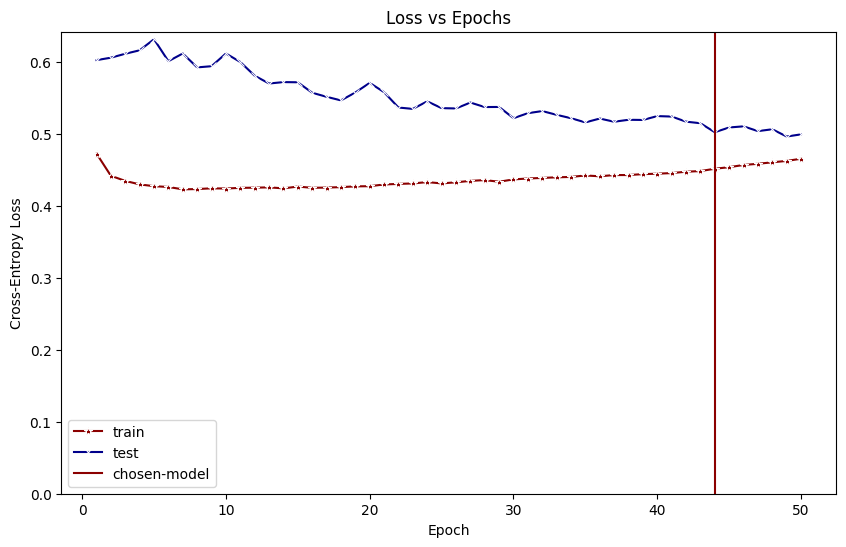

/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



<Test Report>
Precision: [no diabetes] 0.8424195837275308, [pre-diabetes] 0.0, [diabetes] 0.0
Recall: [no diabetes] 1.0, [pre-diabetes] 0.0, [diabetes] 0.0
F1-Score: [no diabetes] 0.9144709393754613, [pre-diabetes] 0.0, [diabetes] 0.0
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 84.2420%
Macro-F1: 0.3048

<Test Report>
Precision: [no diabetes] 0.8439436957651858, [pre-diabetes] 0.24653739612188366, [diabetes] 0.0
Recall: [no diabetes] 0.9875529351208442, [pre-diabetes] 0.025180364973829396, [diabetes] 0.0
F1-Score: [no diabetes] 0.9101180529351517, [pre-diabetes] 0.04569374919779232, [diabetes] 0.0
Support: [no diabetes] 42741, [pre-diabetes] 7069, [diabetes] 926
Accuracy: 83.5442%
Macro-F1: 0.3186


/home/arjun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
# generate lookup for models
models = {
    "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet"),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet"),
    "log": LogClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet")
}

# manual search
models["tree"].set_hyperparams({
    "loss": "log_loss",
    "learning_rate": 0.01,
    "n_estimators": 1000,
    "criterion": "friedman_mse",
    "min_samples_split": 5,
    "min_samples_leaf": 5,
    "max_depth": 8,
    "n_iter_no_change": 5,
    "max_features": "sqrt",
    "tol": 0.0001
})
# models["ffnn"].set_hyperparams({
#     "learning_rate": .0005,
#     "batch_size": 256,
#     "num_hidden": 8,
#     "hidden_size": [2048, 1024, 512, 256, 128, 64, 32, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.875, 0.75, 0.75, 0.5, 0.5, 0.25, 0.25],
#     "classify_fn": "sigmoid"
# })
# models["ffnn"].set_hyperparams({
#     "learning_rate": .001,
#     "batch_size": 32,
#     "num_hidden": 4,
#     "hidden_size": [128, 64, 64, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.5, 0.4, 0.3, 0.2],
#     "classify_fn": "sigmoid"
# # })
models["ffnn"].set_hyperparams({
    "learning_rate": .001,
    "batch_size": 64,
    "num_hidden": 4,
    "hidden_size": 512,
    "num_epochs": 50,
    "dropout_rate": 0.85,
    "classify_fn": "sigmoid"
})
# models["ffnn"].set_hyperparams({
#     "input_size": 21,
#     "output_size": 3,
#     "hidden_size": 512,
#     "num_hidden": 2,
#     "num_epochs": 50,
#     "batch_size": 128,
#     "dropout_rate": 0.4,
#     "learning_rate": 0.0005
# })

# train & test basic model
skip_models = ["ffnn", "log"]
for mt, model in models.items():
    # attempt to load, else train and test
    if mt in skip_models or not model.load_model():
        model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

***
## Interpretation

***
## Conclusion